# Import the libraries

In [1]:
import yfinance as yf
# import pandas_datareader.data as web
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from lazypredict.Supervised import LazyRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt, ceil

# Download the dataset

In [2]:
# Download the dataset
mtdl = yf.Ticker("MTDL.JK")

# Get historical market data
df = mtdl.history(start="2014-01-01", end=None)
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

In [3]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2014-01-02 00:00:00+07:00,43.293315,43.293315,41.091960,41.825745,434556
2014-01-03 00:00:00+07:00,41.825747,42.559532,41.091962,42.559532,1798352
2014-01-06 00:00:00+07:00,42.412775,42.559532,42.412775,42.559532,1334278
2014-01-07 00:00:00+07:00,42.412778,42.412778,41.532236,41.678993,1113447
2014-01-08 00:00:00+07:00,41.678991,41.825748,41.532234,41.532234,9790360
...,...,...,...,...,...
2024-10-02 00:00:00+07:00,630.000000,635.000000,615.000000,625.000000,1602500
2024-10-03 00:00:00+07:00,625.000000,630.000000,615.000000,620.000000,681000
2024-10-04 00:00:00+07:00,620.000000,625.000000,605.000000,605.000000,1751100


In [4]:
# Remove timezone information from the 'Date' index
df.index = df.index.tz_localize(None)
df.index

DatetimeIndex(['2014-01-02', '2014-01-03', '2014-01-06', '2014-01-07',
               '2014-01-08', '2014-01-09', '2014-01-10', '2014-01-13',
               '2014-01-15', '2014-01-16',
               ...
               '2024-09-25', '2024-09-26', '2024-09-27', '2024-09-30',
               '2024-10-01', '2024-10-02', '2024-10-03', '2024-10-04',
               '2024-10-07', '2024-10-08'],
              dtype='datetime64[ns]', name='Date', length=2663, freq=None)

In [7]:
# Convert index to columns
# df = df.reset_index()

In [5]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2014-01-02,43.293315,43.293315,41.091960,41.825745,434556
2014-01-03,41.825747,42.559532,41.091962,42.559532,1798352
2014-01-06,42.412775,42.559532,42.412775,42.559532,1334278
2014-01-07,42.412778,42.412778,41.532236,41.678993,1113447
2014-01-08,41.678991,41.825748,41.532234,41.532234,9790360
...,...,...,...,...,...
2024-10-02,630.000000,635.000000,615.000000,625.000000,1602500
2024-10-03,625.000000,630.000000,615.000000,620.000000,681000
2024-10-04,620.000000,625.000000,605.000000,605.000000,1751100


In [6]:
# Save the file
df.to_excel(r'../data/metrodata_stock_prices.xlsx')

In [30]:
# OPTIONAL
# Create 'Price Range' to see how volatile the stock was during the day
df['Price Range'] = df['High'] - df['Low']

# Create 'Price Change' to determine whether the stock price went up or down during the trading day.
df['Price Change'] = df['Close'] - df['Open']

# Create 'Percentage Change' is for understanding the relative change in stock prices, which is helpful when comparing stocks.
df['Percentage Change'] = (((df['Close'] - df['Open'])/df['Open'])*100)

df

,Open,High,Low,Close,Volume,Price Range,Price Change,Percentage Change
Date,,,,,,,,
2014-01-02,43.293311,43.293311,41.091956,41.825741,434556,2.201355,-1.467570,-3.389831
2014-01-03,41.825747,42.559532,41.091962,42.559532,1798352,1.467570,0.733785,1.754386
2014-01-06,42.412775,42.559532,42.412775,42.559532,1334278,0.146757,0.146757,0.346021
2014-01-07,42.412778,42.412778,41.532236,41.678993,1113447,0.880542,-0.733785,-1.730104
2014-01-08,41.678987,41.825744,41.532230,41.532230,9790360,0.293514,-0.146757,-0.352113
...,...,...,...,...,...,...,...,...
2024-09-20,625.000000,630.000000,610.000000,620.000000,3194800,20.000000,-5.000000,-0.800000
2024-09-23,620.000000,625.000000,615.000000,625.000000,1169800,10.000000,5.000000,0.806452
2024-09-24,625.000000,640.000000,615.000000,635.000000,2525300,25.000000,10.000000,1.600000


# Plot the line

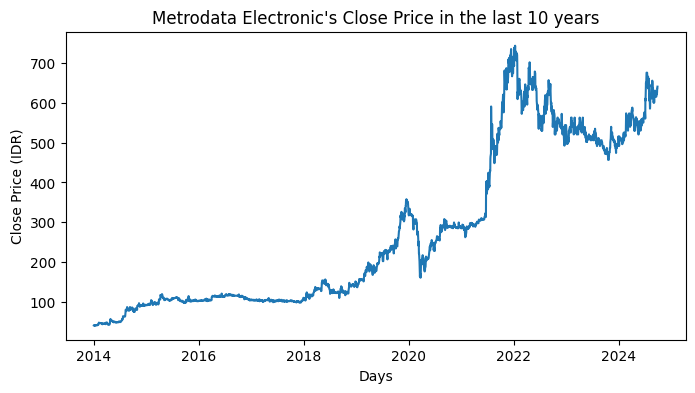

In [7]:
# df.plot.line(y="Close", use_index=True)

plt.figure(figsize=(8, 4))
plt.title("Metrodata Electronic's Close Price in the last 10 years")
plt.xlabel("Days")
plt.ylabel("Close Price (IDR)")
plt.plot(df['Close'])
plt.show()

# Choose the best algorithm

In [8]:
# # predictors = ["Open", "High", "Low"]

# train = df.loc[df.index < '2024-01-01']
# test = df.loc[df.index > '2024-01-01']

# X = df.iloc[:, 0:3]
# y = df.iloc[:, [3]]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 64)
# reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
# models,pred = reg.fit(X_train, X_test, y_train, y_test)
# models

# Fit the model

In [9]:
# predictors = ["Open", "High", "Low"]

# train = df.loc[df.index < '2024-01-01']
# test = df.loc[df.index > '2024-01-01']

X = df.iloc[:, 0:3]
y = df.iloc[:, [3]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 64)

model = xgb.XGBRegressor(random_state = 64)

# model.fit(train[predictors], train["Close"])
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=64, ...)

In [10]:
# test

# Predict the model

In [11]:
# preds = model.predict(test[predictors])
preds = model.predict(X_test)
# preds = pd.Series(preds, index=test.index, name="Predictions_Close")
preds = pd.Series(preds, index=y_test.index, name="Predictions_Close")
preds

Date
2018-10-17    118.971367
2018-09-21    131.381332
2018-07-04    121.231300
2017-03-30    103.003426
2021-08-30    480.638947
                 ...    
2022-02-03    620.541992
2022-10-31    547.570496
2015-05-22    107.250633
2021-05-11    302.795654
2022-12-16    505.082520
Name: Predictions_Close, Length: 797, dtype: float32

# Evaluate the model

In [12]:
# print("The mean absolute error (MAE) is:", mean_absolute_error(test["Close"], preds))
# print("The mean squared error (MSE) is:", mean_squared_error(test["Close"], preds))
# print("The root mean squared error (RMSE) is:", sqrt(mean_squared_error(test["Close"], preds)))
# print("The R2 score is:", ceil(model.score(test[predictors], preds)) * 100, "%")

print("The mean absolute error (MAE) is:", mean_absolute_error(y_test, preds))
print("The mean squared error (MSE) is:", mean_squared_error(y_test, preds))
print("The root mean squared error (RMSE) is:", sqrt(mean_squared_error(y_test, preds)))
print("The R2 score is:", ceil(model.score(X_test, y_test)) * 100, "%")

The mean absolute error (MAE) is: 2.9806513433324797
The mean squared error (MSE) is: 29.560096704113633
The root mean squared error (RMSE) is: 5.436919780915812
The R2 score is: 100 %


# Combined the actual values and the predicted values

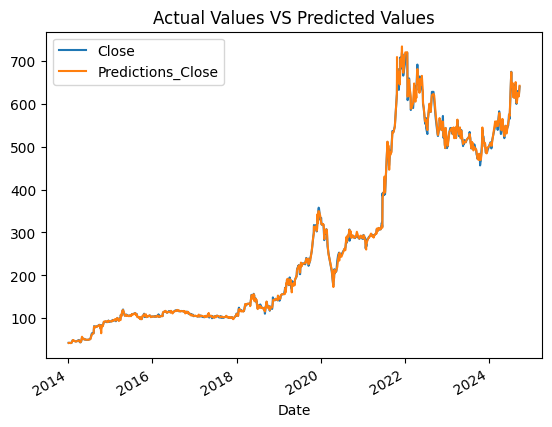

In [13]:
# combined = pd.concat([test["Close"], preds], axis=1)
combined = pd.concat([y_test, preds], axis=1)
combined.plot(title="Actual Values VS Predicted Values");

In [14]:
combined

,Close,Predictions_Close
Date,,
2018-10-17,117.473984,118.971367
2018-09-21,138.204666,131.381332
2018-07-04,122.656647,121.231300
2017-03-30,102.306908,103.003426
2021-08-30,483.331238,480.638947
...,...,...
2022-02-03,617.999817,620.541992
2022-10-31,548.456604,547.570496
2015-05-22,108.236145,107.250633


# Predict the model by manual

In [15]:
df[['Open', 'High', 'Low', 'Close']].tail(1)

,Open,High,Low,Close
Date,,,,
2024-09-26,635.0,645.0,625.0,640.0


In [16]:
# prediction = model.predict([[570.00, 580.00, 570.00]])
prediction = model.predict(df[['Open', 'High', 'Low']].tail(1))
prediction

array([642.2404], dtype=float32)

In [17]:
mtdl.info

{'address1': 'APL Tower',
 'address2': '37th Floor Suite 3 Jalan Letjen S. Parman Kav. 28',
 'city': 'Jakarta',
 'zip': '11470',
 'country': 'Indonesia',
 'phone': '62 21 2934 5888',
 'fax': '62 21 2934 5899',
 'website': 'https://www.metrodata.co.id',
 'industry': 'Electronics & Computer Distribution',
 'industryKey': 'electronics-computer-distribution',
 'industryDisp': 'Electronics & Computer Distribution',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'PT Metrodata Electronics Tbk, together with its subsidiaries, engages in the information and communication technology (ICT) business in Indonesia. It operates through two divisions, Distribution and Solution and Consultation. The Distribution division sells hardware and software, and basic peripherals, such as data storage devices, terminals, memory, and peripherals. The Solution and Consultation division provides maintenance services; sells hardware, system management softw

In [18]:
mtdl.balance_sheet

,2023-12-31,2022-12-31,2021-12-31,2020-12-31,2019-12-31
Ordinary Shares Number,NaN,12276884585.0,12276884585.0,12276884585.0,12276884585.0
Share Issued,NaN,12276884585.0,12276884585.0,12276884585.0,12276884585.0
Total Debt,NaN,0.0,NaN,15877000000.0,193240000000.0
Tangible Book Value,NaN,3223041000000.0,2763107000000.0,2335918000000.0,2098854000000.0
Invested Capital,NaN,3223041000000.0,2763107000000.0,2335918000000.0,2253854000000.0
...,...,...,...,...,...
Cash Cash Equivalents And Short Term Investments,NaN,1383372000000.0,1656604000000.0,1848847000000.0,765180000000.0
Other Short Term Investments,NaN,NaN,NaN,5252000000.0,7664000000.0
Cash And Cash Equivalents,NaN,1383372000000.0,1656604000000.0,1848847000000.0,757516000000.0
Cash Equivalents,NaN,917606000000.0,629683000000.0,826894000000.0,437490000000.0


In [19]:
# show share count
# mtdl.get_shares_full(start="2014-01-01", end=None)
# mtdl.balance_sheet
# mtdl.get_income_stmt()
mtdl.financials
# mtdl.info

,2023-12-31,2022-12-31,2021-12-31,2020-12-31,2019-12-31
Tax Effect Of Unusual Items,NaN,0.0,0.0,0.0,0.0
Tax Rate For Calcs,NaN,0.23878,0.225367,0.229848,0.253638
Normalized EBITDA,NaN,1151512000000.0,984423000000.0,708160000000.0,745545000000.0
Total Unusual Items,NaN,NaN,NaN,NaN,-10367000000.0
Total Unusual Items Excluding Goodwill,NaN,NaN,NaN,NaN,-10367000000.0
Net Income From Continuing Operation Net Minority Interest,NaN,580496000000.0,508882000000.0,364934000000.0,357071000000.0
Reconciled Depreciation,NaN,NaN,NaN,18902000000.0,19153000000.0
Reconciled Cost Of Revenue,NaN,19258198000000.0,16994438000000.0,12760820000000.0,13860930000000.0
EBITDA,NaN,1151512000000.0,984423000000.0,708160000000.0,745545000000.0
EBIT,NaN,1151512000000.0,984423000000.0,708160000000.0,726392000000.0
